In [50]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, tree
import pandas as pd
from scipy.stats import skew
import seaborn as sns
import pydot
sns.set(style='ticks', palette='Set2')
%matplotlib inline

np.random.seed(0)

****Q1Large Correlations****

•When given a data matrix, an easy way to tell if any two columns are correlated is to look at a scatter plot of each column against each other column.  For a warm up, do this: Look at the data in DF1 in Lab2.zip.  Which columns are (pairwise) correlated?  Figure out how to do this with Pandas, and also how to do this with Seaborn.

•Compute the covariance matrix of the data.  Write the explicit expression for what this is,  and  then  use  any  command  you  like  (e.g.,  np.cov)  to  compute  the  4×4  matrix. Explain why the numbers that you get fit with the plots you got.

•The  above  problem  in  reverse.   Generate  a  zero-mean  multivariate  Gaussian  randomvariable in 3 dimensions, $Z= (X1,X2,X3)$ so that $(X1,X2)$ and $(X1,X3)$ are uncorrelated, but $(X2,X3)$ are correlated.  Specifically:  choose a covariance matrix that has the above correlations structure, and write this down.  Then find a way to generate samples from  this  Gaussian.   Choose  one  of  the  non-zero  covariance  terms  ($C_{ij}$,  if $C$ denotes your covariance matrix) and plot it vs the estimated covariance term, as the number of samples you use scales.  The goal is to get a visual representation of how the empirical covariance converges to the true (or family) covariance.

Answer

Pandas Covariance Scatter Plot


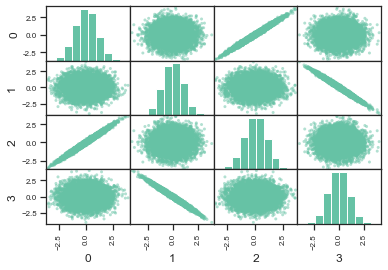

Seaborn Covariance Scatter Plot


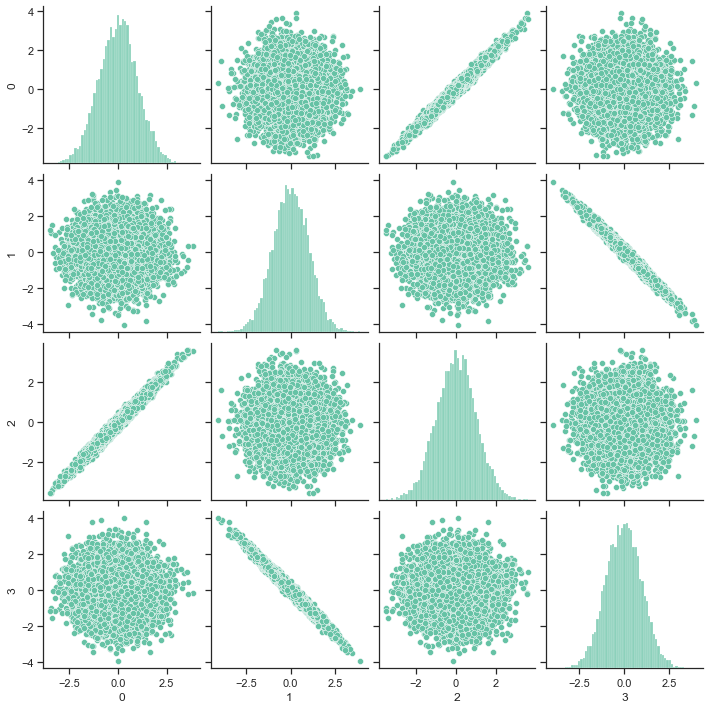

In [25]:
# part 1
df = pd.read_csv('DF1', sep=',', header=0, index_col=0)

print('Pandas Covariance Scatter Plot')
pd.plotting.scatter_matrix(df)
plt.show()

print('Seaborn Covariance Scatter Plot')
sns.pairplot(df)
plt.show()

In [26]:
# part 2
cov = np.cov(df, rowvar=False)      
print('Covariance Matrix:\n', cov)

Covariance Matrix:
 [[ 1.00155793 -0.00401176  0.99162409  0.00412485]
 [-0.00401176  1.00537841 -0.00409877 -0.99545662]
 [ 0.99162409 -0.00409877  1.00158867  0.00408108]
 [ 0.00412485 -0.99545662  0.00408108  1.00516828]]


Covariance Matrix:
 [[1.  0.  0. ]
 [0.  1.  0.9]
 [0.  0.9 1. ]]


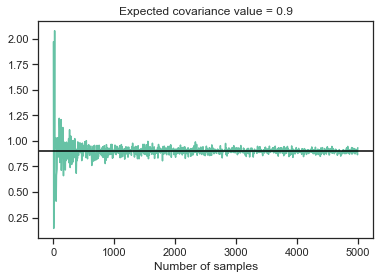

In [27]:

# part 3
np.random.seed(2)
covMatrix = [[1, 0, 0], [0, 1, 0.9], [0, 0.9, 1]]
mu = [0, 0, 0]
print('Covariance Matrix:\n', np.array(covMatrix))
cov_x = range(2, 5000, 5)
cov_y =[np.cov(np.random.multivariate_normal(mu, size=n, cov=covMatrix), rowvar=False)[1][2] for n in cov_x]

plt.title('Expected covariance value = 0.9')
plt.xlabel('Number of samples')
plt.plot(cov_x, cov_y)
plt.axhline(0.9, 0, 5000, color='k')
plt.show()

****Q2 Large Outliers****

Consider the two-dimensional data in DF2 in Lab2.zip.  Look at a scatter plot of the data.  It contains two points that look like potential outliers.  Which one is “more” outlying?  Propose a transformation of the data that makes it clear that the point at $(−1,1)$ is  more  outlying  than  the  point  at  $(5.5,5)$,  even  though  the  latter  point  is “farther  away” from the nearest points.  Plot the data again after performing this transformation.  Provide discussion as appropriate to justify your choice of transformation. *Hint:  if $y$ comes  from  a standard  Gaussian  in  two  dimensions  (i.e.,  with  covariance  equal  to  the  two  by  two  identity matrix), and $$Q=\left(\begin{array}{cc}2 & \frac{1}{2}\\\frac{1}{2} & 2\end{array}\right)$$, what is the covariance matrix of the random variable $z=Qy$?  If you are given $z$, how would you create a random Gaussian vector with covariance equal to the identity, using $z$?*

Answer

The covariance matrix $\Sigma_z$ of $z$ is $Q\Sigma_yQ^T$, where $\Sigma_y$ is the covariance matrix of $y$. Since $\Sigma_y$ is the identity matrix, $\Sigma_z = QQ^T$. We can interpret $z$ as the random variable from which the dataset is sampled. To transform $z$ back to $y$, one simply needs to do $Q^{-1}z$, which will result in an identity covariance matrix. Since we do not know $Q$ in pratice, we need to find $Q$ from the covariance matrix $\Sigma_z$ of the data. One can use eigendecomposition (or singular value decomposition) to express the covariance matrix as $\Sigma_z = WVW^T$, where columns of $W$ contains the eigenvectors of $\Sigma_z$ and $V$ is a diagonal matrix containing the eigenvalues. Since $V$ is diagonal and $W$ is orthogonal: $W^T = W^{-1}$, we can write $\Sigma_z = WV^{\frac{1}{2}}V^{\frac{1}{2}}W^T = (WV^{\frac{1}{2}})(WV^{\frac{1}{2}})^{T}$. Hence we can transform the dataset by pre-multiplying it with $(WV^{\frac{1}{2}})^{-1} = V^{\frac{-1}{2}}W^{T}$. This process is known as statistical whitening or the whitening transformation. This allows us to decorrelate the data dimensions and make each dimension have unit variance. Using Eigen Value Decomposition is one of the solutions.

          0         1
0  1.038502  0.835053
1  0.320455  0.149079
2  0.055480  0.271672
3 -0.007260 -0.126550
4 -1.237390 -1.049932


(-10.0, 15.0)

<Figure size 432x288 with 0 Axes>

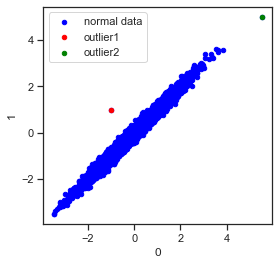

<Figure size 432x288 with 0 Axes>

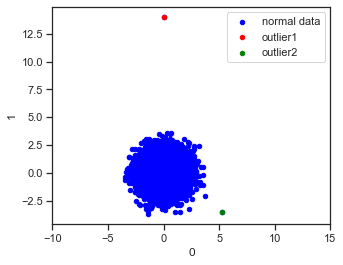

In [29]:
df = pd.read_table("./DF2", sep=',', index_col=0)
print(df.head())

#find index of outliers
outlier1_idx = df.index[(df['0']==-1) & (df['1']==1)]
outlier2_idx = df.index[(df['0']==5.5) & (df['1']==5)]

#plot original data distribution
fig1 = plt.figure()
ax1 = df.plot(x=0, y=1, kind="scatter", c="blue")
df.loc[outlier1_idx].plot(x=0, y=1, kind="scatter", c="red",ax=ax1)
df.loc[outlier2_idx].plot(x=0, y=1, kind="scatter", c="green",ax=ax1)
ax1.legend(['normal data','outlier1','outlier2'])
ax1.set_aspect('equal')

#transform data through statistical whitening
cov = np.cov(df, rowvar=False)
w,v = np.linalg.eig(cov)
Q = np.diag(w**(-1/2)) @ v.T
newData = Q @ df.T
newData = newData.T

#plot transformed data distribution
fig2 = plt.figure()
ax2 = newData.plot(x=0, y=1, kind="scatter", c="blue")
newData.loc[outlier1_idx].plot(x=0, y=1, kind="scatter", c="red",ax=ax2)
newData.loc[outlier2_idx].plot(x=0, y=1, kind="scatter", c="green",ax=ax2)
ax2.legend(['normal data','outlier1','outlier2'])
ax2.set_aspect('equal')
ax2.set_xlim(-10,15)

****Q4 Large Names and Frequencies****

The goal of this exercise is for you to get more experience with Pandas, and to get a chance to explore a cool data set.  Download the fileNames.zip from Canvas.  This contains the frequency of all names that appeared more than 5 times on a social security application from 1880 through 2015.

•Write a program that on input $k$ and XXXX, returns the top $k$ names from year XXXX.
 
•Write a program that on input Name returns the frequency for men and women of the name Name.
 
•It could be that names are more diverse now than they were in 1880, so that a name may be relatively the most popular, though its frequency may have been decreasing over the years.  Modify the above to return the relative frequency.

•Find all the names that used to be more popular for one gender, but then became more popular for another gender.

•(Optional) Find something cool about this data set.

In [31]:
#create pandas dataframe from one .txt file
def getData(year):
    #read the .txt file into a dataframe to work with
    return pd.read_csv("./Names/yob%s.txt" % year ,names = ["Name", "Gender", "Number"])

#find the k largest names by year
def top_k_by_year(k, year):
    data = getData(year)
    return data.nlargest(k, 'Number')['Name']

#find the number of occurences of a particular name in a certain year for both males and females
def name_frequency(name, year):
    data = getData(year)
    
    #find all the people in a particular year with the same name and each gender
    male_result = data['Number'].loc[(data['Name'] == name) & (data['Gender'] == 'M')]
    female_result = data['Number'].loc[(data['Name'] == name) & (data['Gender'] == 'F')]
    
    male_count = male_result.values[0] if not male_result.empty else 0
    female_count = female_result.values[0] if not female_result.empty else 0
    return male_count, female_count

#find the occurences of a name in our dataset:
def name_frequency_all_years(name):
    male_count_total = 0
    female_count_total = 0
    for year in range(1880,2016):
        male_count, female_count = name_frequency(name, year)
        male_count_total += male_count
        female_count_total += female_count
    
    return male_count_total, female_count_total

#find the frequency of a name, relative to the total number of different names that year
def relative_frequency(name, year):
    data = getData(year)
    male_name_count, female_name_count = name_frequency(name, year)
    
    #sum up the number of names in a year, and then return the relative frequencies per gender
    total = float(np.sum(data,axis=0)[2])
    return male_name_count / total, female_name_count / total
    
#find the frequency of a name over the course of all the records
def get_every_year_frequency(name, relative=False):
    data = []
    for year in range(1880, 2016):
        #get data
        df = getData(year)
        df['Year'] = year
        if not relative:
            #if not relative, add new Frequency column with absolute frequency values
            male_freq, female_freq = name_frequency(name, year)
            df.loc[(df['Name'] == name) & (df['Year'] == year) & (df['Gender'] == 'M'), 'Frequency'] = male_freq
            df.loc[(df['Name'] == name) & (df['Year'] == year) & (df['Gender'] == 'F'), 'Frequency'] = female_freq
        else:
            #if not relative, add new Frequency column with relative frequency values
            male_freq, female_freq = relative_frequency(name, year)
            df.loc[(df['Name'] == name) & (df['Year'] == year) & (df['Gender'] == 'M'), 'Frequency'] = male_freq
            df.loc[(df['Name'] == name) & (df['Year'] == year) & (df['Gender'] == 'F'), 'Frequency'] = female_freq
        #add yearly data to collection of data using only the year, name, frequency, and gender columns
        data.append(df.loc[(df['Name'] == name) & (df['Year'] == year), ('Year', 'Name', 'Frequency', 'Gender')])
    #create one dataframe from the array of smaller dataframes
    data = pd.concat(data)
    return data

#plot the frequency of a name over time
def plot_frequency_data(data, name='', relative=False):
    sns.set_style('whitegrid')
    f = plt.figure(figsize=(18, 8))
        
    sns.pointplot(data=data, x='Year', y='Frequency', hue='Gender')
    sns.despine()
    f.tight_layout()

    plt.title('Frequency of %s throughout US population' % (name))
    if not relative:
        plt.ylabel('Absolute Frequency')
    else:
        plt.ylabel('Relative Frequency (% of population)')

    plt.xlabel('Year')
    plt.xticks(rotation=90)
    plt.show()
    
#find which names started off being more popular for one gender and later switched to another gender
def find_more_popular():
    data = []
    for year in range(1880,2016):
        df = getData(year)
        df['Year'] = year
        data.append(df)
        
    data = pd.concat(data)
    
    #create new diff column with number of names positive for males and negative for females
    data["diff"] = data["Gender"].map({'M':1,'F':-1})
    data["diff"] = data["diff"] * data["Number"]
    
    #group data by name and year, sum up the columns, and drop the year column
    data = data.groupby(["Name","Year"]).sum()
    data = data.reset_index().drop('Year',1)
    
    #for each name, create new columns with the minimum value (i.e. females) and maximum value (i.e. males) 
    data = data.groupby('Name').agg({'diff':['min','max']})
    data.columns = ['min', 'max']
    
    #create new switch column which identifies if a name switched from positive to negative or vice verse
    data['switch'] = (np.sign(data["min"] * data['max']) == -1)
    
    #Remove data that didn't switch gender
    data = data[data['switch']].reset_index()
    
    return data['Name'].values

In [34]:
# Part 1
print(top_k_by_year(100, 2000).to_string(index=False))

      Jacob
    Michael
    Matthew
     Joshua
      Emily
Christopher
   Nicholas
     Andrew
     Hannah
     Joseph
     Daniel
      Tyler
    William
    Brandon
       Ryan
       John
    Madison
    Zachary
      David
    Anthony
     Ashley
      James
     Justin
      Sarah
     Alexis
  Alexander
   Samantha
   Jonathan
  Christian
     Austin
    Jessica
      Dylan
      Ethan
  Elizabeth
     Taylor
   Benjamin
       Noah
     Lauren
     Samuel
     Robert
     Alyssa
      Kayla
    Abigail
     Nathan
    Brianna
     Olivia
    Cameron
      Kevin
     Thomas
       Jose
       Emma
     Hunter
     Jordan
       Kyle
      Megan
      Grace
   Victoria
     Rachel
       Anna
     Sydney
      Caleb
    Destiny
      Jason
      Logan
      Aaron
     Morgan
   Jennifer
       Eric
    Jasmine
      Haley
      Brian
      Julia
    Kaitlyn
    Gabriel
     Nicole
     Amanda
       Adam
       Jack
  Katherine
    Natalie
     Isaiah
     Hailey
       Juan
    

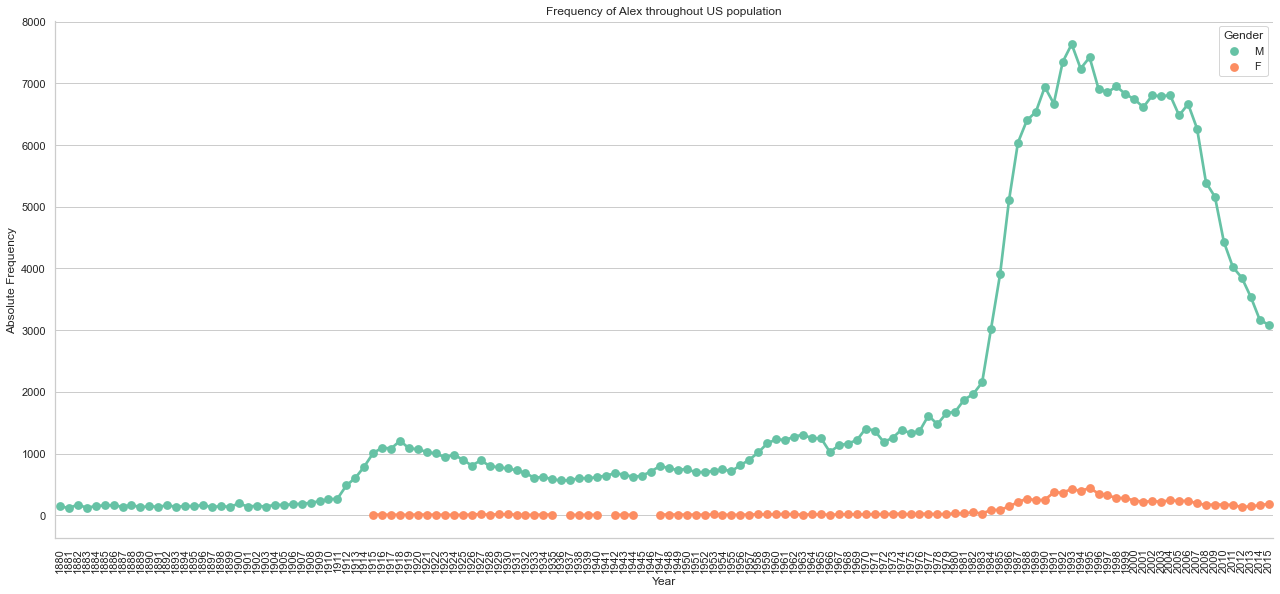

In [35]:
# Part 2
data = get_every_year_frequency('Alex')
plot_frequency_data(data, name='Alex')

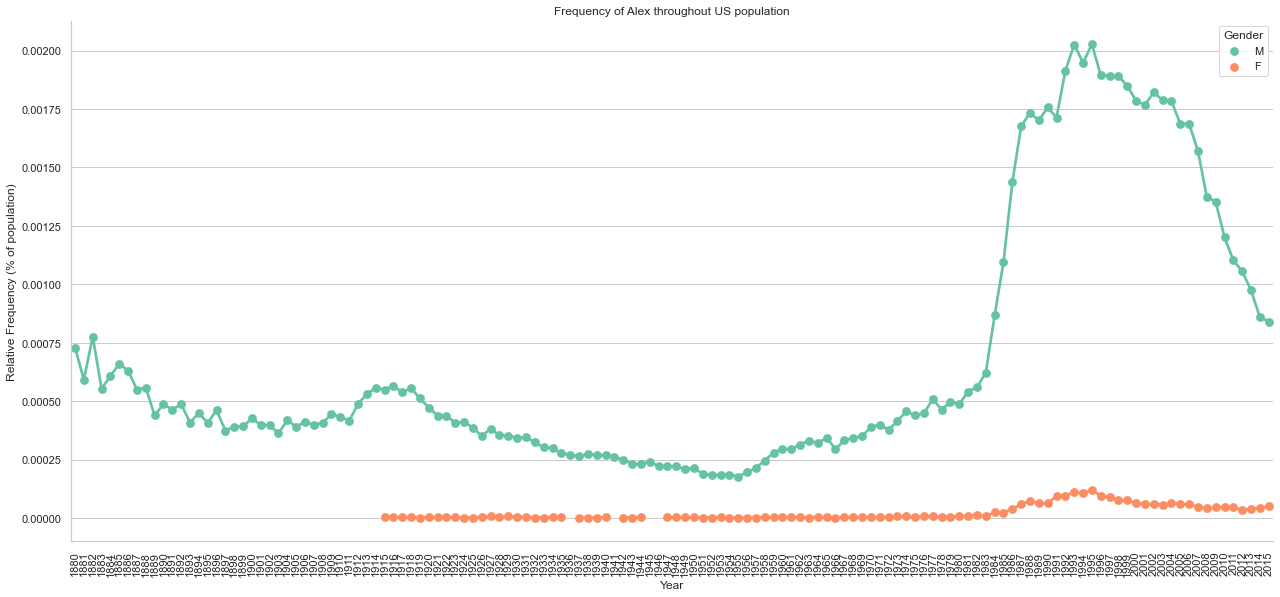

In [38]:
# Part 3
data = get_every_year_frequency('Alex', relative=True)
plot_frequency_data(data, name='Alex', relative=True)

['Aalijah' 'Aamari' 'Aaren' 'Aareon' 'Aari' 'Aarian' 'Aarin' 'Aaris'
 'Aarya' 'Aaryn' 'Aavyn' 'Aba' 'Abba' 'Abbey' 'Abell' 'Abey' 'Abie'
 'Abijah' 'Abimbola' 'Abiola' 'Abir' 'Abishai' 'Abiyah' 'Abney' 'Abrar'
 'Abraxas' 'Abrian' 'Abriel' 'Aby' 'Abyan' 'Acelin' 'Acey' 'Acy' 'Adair'
 'Adali' 'Adama' 'Adar' 'Adason' 'Addington' 'Addis' 'Addison' 'Adean'
 'Adebola' 'Adel' 'Adell' 'Adeyinka' 'Adgie' 'Adi' 'Adie' 'Adis' 'Adisa'
 'Adison' 'Adley' 'Admire' 'Adna' 'Adonai' 'Adoniah' 'Adraine' 'Adrean'
 'Adriann' 'Adrien' 'Adrienn' 'Adrin' 'Adrine' 'Adryan' 'Adryn' 'Adyn'
 'Aeon' 'Aerion' 'Aeron' 'Afsheen' 'Afton' 'Agam' 'Agape' 'Ah' 'Ahmari'
 'Aideen' 'Aidyn' 'Aidynn' 'Aijalon' 'Aiman' 'Aimar' 'Aime' 'Aimen'
 'Ainsley' 'Airen' 'Aireon' 'Aires' 'Airin' 'Airon' 'Aivan' 'Ajae' 'Ajai'
 'Ajalon' 'Ajene' 'Akai' 'Aki' 'Akida' 'Akie' 'Akili']


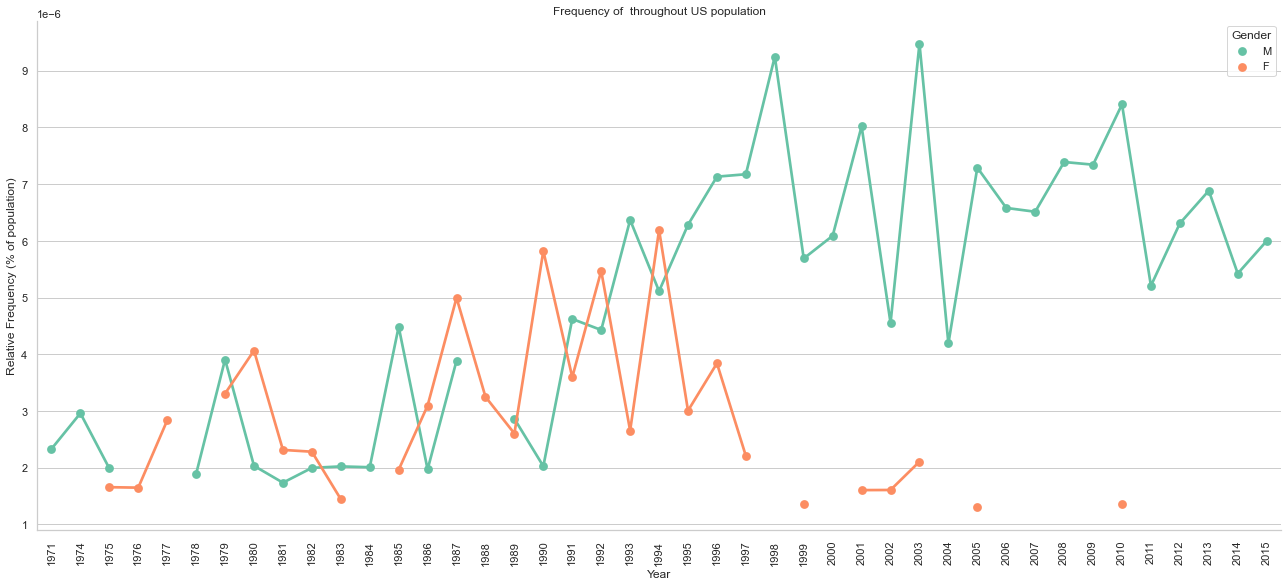

In [39]:
# Part 4
print(find_more_popular()[0:100]) #print first 100 names

data = get_every_year_frequency('Aaren', relative=True)
plot_frequency_data(data, relative=True)

****Q4 Starting in Kaggle****

Answer

In [51]:
from scipy.stats import skew

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],test.loc[:,'MSSubClass':'SaleCondition']))

In [52]:

# log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

# log transform skewed numeric features
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))  # compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(all_data.mean())

X_train = all_data[: train.shape[0]]
X_test = all_data[train.shape[0] :]
y = train.SalePrice


****Ridge and Lasso Regression Models****

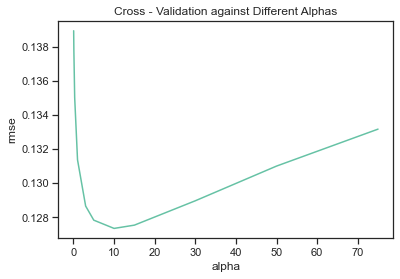

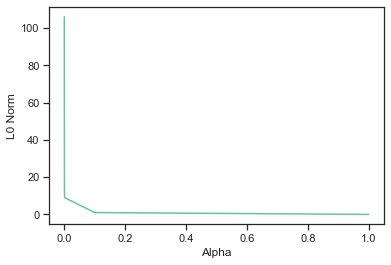

In [59]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv=5))
    return rmse


model_ridge = Ridge()

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha=alpha)).mean() for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index=alphas)
cv_ridge.plot(title="Cross - Validation against Different Alphas")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

alphas = [1, 0.1, 0.001, 0.0005, 1e-5]
cv_lasso = [rmse_cv(LassoCV(eps=alpha).fit(X_train, y)).mean() for alpha in alphas]
coef = [LassoCV(eps=alpha).fit(X_train, y).coef_ for alpha in alphas]

l0 = list()
for array in coef:
    l0.append(sum(array != 0))

plt.plot(alphas, l0)
plt.xlabel("Alpha")
plt.ylabel("L0 Norm")
plt.show()

We will now “stack” the models by feeding the predictions of one model into another model. Ifyou use the data point label to train on the model, then there is some leakage of the labels whentraining the second model.

We split the data set into 5 folds. For each fold, we make a prediction on the data in this fold usinga training set made up of the other 4 folds

In [63]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

X_train_mat = X_train.values
kf = KFold(5)
n, d = X_train_mat.shape
X_stacked = np.concatenate([X_train_mat, np.zeros([n, 2])], axis=1)
ridge_mse = []
lasso_mse = []
for split_idx, val_idx in kf.split(X_train_mat, y):
    X_split = X_train_mat[split_idx]
    y_split = y[split_idx]
    X_val = X_train_mat[val_idx]
    y_val = y[val_idx]

    ridge = Ridge(alpha=10)
    ridge.fit(X_split, y_split)
    ridge_pred = ridge.predict(X_val)
    X_stacked[val_idx, -2] = ridge_pred

    ridge_mse.append(mean_squared_error(y_val, ridge_pred))
    lasso = Lasso(alpha=0.0005)
    lasso.fit(X_split, y_split)
    lasso_pred = lasso.predict(X_val)
    lasso_mse.append(mean_squared_error(y_val, lasso_pred))
    X_stacked[val_idx, -1] = lasso_pred

print("Ridge MSE: {}".format(np.mean(ridge_mse)))
print("Lasso MSE: {}".format(np.mean(lasso_mse)))

ridge = Ridge(alpha=1.0)
stack_mse = -cross_val_score(ridge, X_stacked, y, scoring="neg_mean_squared_error", cv=5)
print("Stacked MSE: {}".format(np.mean(stack_mse)))


Ridge MSE: 0.01646516096612687
Lasso MSE: 0.0152957410414015
Stacked MSE: 0.012207897337088847


We see that stacking decreases the error. If we use the predictions from the model that had accessto the labels of the data points we see that the error increases after stacking due to overfitting.

In [66]:

ridge_mse = []
lasso_mse = []
stack_mse = []

for split_idx, val_idx in kf.split(X_train_mat, y):
    X_split = X_train_mat[split_idx]
    y_split = y[split_idx]
    X_val = X_train_mat[val_idx]
    y_val = y[val_idx]

    ridge = Ridge(alpha=10)
    ridge.fit(X_split, y_split)
    ridge_stack = ridge.predict(X_train)
    ridge_pred = ridge.predict(X_val)

    ridge_mse.append(mean_squared_error(y_val, ridge_pred))
    lasso = Lasso(alpha=0.0005)
    lasso.fit(X_split, y_split)
    lasso_stack = lasso.predict(X_train)
    lasso_pred = lasso.predict(X_val)
    lasso_mse.append(mean_squared_error(y_val, lasso_pred))
    X_stacked = np.hstack((X_train_mat, np.reshape(ridge_stack, (-1, 1)), np.reshape(lasso_stack, (-1, 1))))
    stack = Ridge(alpha=1.0)
    stack.fit(X_split, y_split)
    stack_pred = stack.predict(X_val)
    stack_mse.append(mean_squared_error(y_val, stack_pred))

print("Ridge MSE: {}".format(np.mean(ridge_mse)))
print("Lasso MSE: {}".format(np.mean(lasso_mse)))
print("Stacked MSE: {}".format(np.mean(stack_mse)))

Ridge MSE: 0.01646516096612687
Lasso MSE: 0.0152957410414015
Stacked MSE: 0.017524852974200644
